In [1]:
%matplotlib inline
from __future__ import print_function
from wordcloud import WordCloud
from gensim import corpora, models, similarities,  matutils
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the data
corpus = corpora.BleiCorpus('/Users/user/Desktop/data/ap/ap.dat', '/Users/user/Desktop/data/ap/vocab.txt')

In [3]:
' '.join(dir(corpus))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __iter__ __len__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _load_specials _save_specials _smart_save docbyoffset fname id2word index length line2doc load save save_corpus serialize'

In [4]:
corpus.id2word.items()[:3]

[(0, u'i'), (1, u'new'), (2, u'percent')]

In [5]:
NUM_TOPICS = 100

In [6]:
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

In [7]:
' '.join(dir(model))

'__class__ __delattr__ __dict__ __doc__ __format__ __getattribute__ __getitem__ __hash__ __init__ __module__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _adapt_by_suffix _apply _load_specials _save_specials _smart_save alpha bound chunksize clear decay dispatcher distributed do_estep do_mstep eta eval_every expElogbeta gamma_threshold get_document_topics get_topic_terms id2word inference init_dir_prior iterations load log_perplexity minimum_probability num_terms num_topics num_updates numworkers offset optimize_alpha optimize_eta passes print_topic print_topics save show_topic show_topics state sync_state top_topics update update_alpha update_eta update_every'

In [8]:
document_topics = [model[c] for c in corpus]

In [9]:
# how many topics does one document cover?
document_topics[2]

[(13, 0.10902094115367938),
 (48, 0.61612414255997783),
 (53, 0.17483975053824485),
 (54, 0.023451515225649089),
 (65, 0.023740728781474173),
 (85, 0.013541115371884155)]

In [10]:
# The first topic
# format: weight, term
model.show_topic(0, 10)

[(u'contributions', 0.010539211263055907),
 (u'new', 0.01006138084309127),
 (u'defense', 0.0092145552046527853),
 (u'riegle', 0.0089153188322997588),
 (u'contractors', 0.0088927204048749493),
 (u'rep', 0.0070187265882710051),
 (u'panels', 0.0062849472334705319),
 (u'senate', 0.0062678798499758185),
 (u'neat', 0.0062323412794084041),
 (u'committee', 0.0062045194924156052)]

In [11]:
# The 100 topic
# format: weight, term
model.show_topic(99, 10)

[(u'hopkins', 0.016961127450839816),
 (u'million', 0.01459901492837634),
 (u'bendjedid', 0.011682872938761541),
 (u'debt', 0.009597735573095097),
 (u'billion', 0.0095221569769315187),
 (u'asylumseekers', 0.0085543749600913311),
 (u'institutional', 0.0084562137593455142),
 (u'countries', 0.0082128886518932475),
 (u'load', 0.0060664157165765094),
 (u'restructuring', 0.0060016188033652695)]

In [12]:
words = model.show_topic(0, 5)
words

[(u'contributions', 0.010539211263055907),
 (u'new', 0.01006138084309127),
 (u'defense', 0.0092145552046527853),
 (u'riegle', 0.0089153188322997588),
 (u'contractors', 0.0088927204048749493)]

In [13]:
model.show_topics(4)

[(91,
  u'0.023*gunter + 0.011*ag + 0.010*million + 0.008*le + 0.008*boring + 0.007*rig + 0.006*new + 0.006*carter + 0.005*victor + 0.005*two'),
 (30,
  u'0.019*percent + 0.017*dukakis + 0.012*bush + 0.009*new + 0.007*million + 0.006*campaign + 0.006*jackson + 0.005*poll + 0.005*year + 0.005*president'),
 (10,
  u'0.024*stock + 0.021*index + 0.021*market + 0.017*shares + 0.016*million + 0.013*exchange + 0.013*points + 0.013*average + 0.012*volume + 0.011*rose'),
 (83,
  u'0.019*nordstrom + 0.018*cat + 0.012*united + 0.008*aliens + 0.008*states + 0.008*detention + 0.007*chinese + 0.006*million + 0.006*new + 0.005*food')]

In [14]:
for f, w in words[:10]:
    print(f, w)

contributions 0.0105392112631
new 0.0100613808431
defense 0.00921455520465
riegle 0.0089153188323
contractors 0.00889272040487


In [16]:
# write out topcis with 10 terms with weights
for ti in range(model.num_topics):
    words = model.show_topic(ti, 10)
    tf = sum(f for w, f in words)
    with open('/Users/user/Desktop/data/ap/topics_term_weight.txt', 'a') as output:
        for f, w in words:
            line = str(ti) + '\t' +  f + '\t' + str(w/tf) 
            output.write(line + '\n')

In [17]:
# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [19]:
# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)
words = np.array(words).T
words_freq=[float(i)*10000000 for i in words[1]]
words = zip(words[0], words_freq)

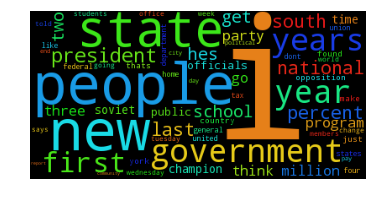

In [20]:
wordcloud = WordCloud().generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

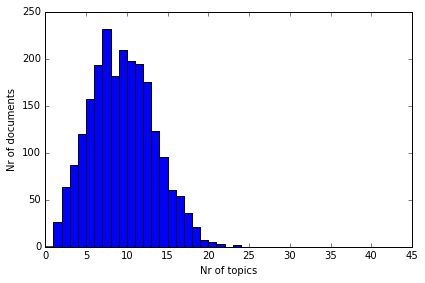

In [21]:
num_topics_used = [len(model[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
#fig.savefig('Figure_04_01.png')

In [22]:
# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play around with this parameter
ALPHA = 1.0
model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)

num_topics_used1 = [len(model1[doc]) for doc in corpus]

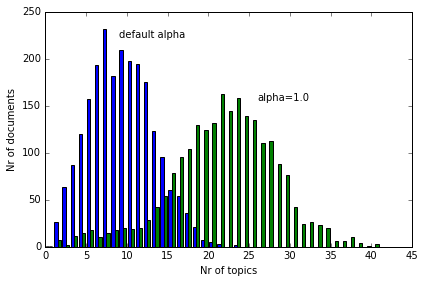

In [23]:
fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
# The coordinates below were fit by trial and error to look good
plt.text(9, 223, r'default alpha')
plt.text(26, 156, 'alpha=1.0')
fig.tight_layout()

In [24]:
with open('/Users/user/Desktop/data/ap/ap.txt', 'r') as f:
    dat = f.readlines()

In [25]:
dat[:6]

['<DOC>\n',
 '<DOCNO> AP881218-0003 </DOCNO>\n',
 '<TEXT>\n',
 " A 16-year-old student at a private Baptist school who allegedly killed one teacher and wounded another before firing into a filled classroom apparently ``just snapped,'' the school's pastor said. ``I don't know how it could have happened,'' said George Sweet, pastor of Atlantic Shores Baptist Church. ``This is a good, Christian school. We pride ourselves on discipline. Our kids are good kids.'' The Atlantic Shores Christian School sophomore was arrested and charged with first-degree murder, attempted murder, malicious assault and related felony charges for the Friday morning shooting. Police would not release the boy's name because he is a juvenile, but neighbors and relatives identified him as Nicholas Elliott. Police said the student was tackled by a teacher and other students when his semiautomatic pistol jammed as he fired on the classroom as the students cowered on the floor crying ``Jesus save us! God save us!'' Fri

In [26]:
dat[4].strip()[0]

'<'

In [27]:
docs = []
for i in dat[:100]:
    if i.strip()[0] != '<':
        docs.append(i)

In [28]:
def clean_doc(doc):
    doc = doc.replace('.', '').replace(',', '')
    doc = doc.replace('``', '').replace('"', '')
    doc = doc.replace('_', '').replace("'", '')
    doc = doc.replace('!', '')
    return doc
docs = [clean_doc(doc) for doc in docs]

In [29]:
texts = [[i for i in doc.lower().split()] for doc in docs]

In [34]:
#import nltk
#nltk.download()

In [33]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [35]:
' '.join(stop)

u'i me my myself we our ours ourselves you your yours yourself yourselves he him his himself she her hers herself it its itself they them their theirs themselves what which who whom this that these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don should now d ll m o re ve y ain aren couldn didn doesn hadn hasn haven isn ma mightn mustn needn shan shouldn wasn weren won wouldn'

In [36]:
stop.append('said')

In [37]:
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1 and token not in stop]
        for text in texts]

In [38]:
docs[8]

' Here is a summary of developments in forest and brush fires in Western states:\n'

In [39]:
' '.join(texts[9])

'stirbois 2 man extreme-right national front party le pen died saturday automobile police 43 stirbois political meeting friday city dreux miles west paris traveling toward capital car ran police stirbois national front member party since born paris law headed business stirbois several extreme-right political joining national front 1977 percent vote local elections west paris highest vote percentage candidate year half later deputy dreux stirbois deputy national 1986 lost elections last national front founded le pen frances government death priority first years presidential elections le pen percent vote national front could'

In [40]:
dictionary = corpora.Dictionary(texts)
lda_corpus = [dictionary.doc2bow(text) for text in texts]
#The function doc2bow() simply counts the number of occurences of each distinct word, 
# converts the word to its integer word id and returns the result as a sparse vector. 

In [41]:
lda_model = models.ldamodel.LdaModel(
    lda_corpus, num_topics=NUM_TOPICS, id2word=dictionary, alpha=None)

In [43]:
import pyLDAvis.gensim

ap_data = pyLDAvis.gensim.prepare(lda_model, lda_corpus, dictionary)

/Users/user/anaconda/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.220677167878 and the largest is 0.786400253228.
  RuntimeWarning


In [44]:
pyLDAvis.enable_notebook()
pyLDAvis.display(ap_data)

In [45]:
pyLDAvis.save_html(ap_data, '/Users/user/Desktop/data/ap/ap_ldavis.html')